In [1]:
from google.colab import drive
drive.mount("/content/gdrive")

Mounted at /content/gdrive


In [2]:
import os
colab_dir = '/content/gdrive/My Drive'
my_dir    = '/BIG DATA N APPLICATION'
path      = colab_dir + my_dir

%cd $path 

/content/gdrive/My Drive/BIG DATA N APPLICATION


In [3]:
import nltk
import re

In [4]:
import nltk
from nltk.corpus import sentiwordnet as swn

In [5]:
nltk.download('averaged_perceptron_tagger')
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('omw-1.4')
nltk.download('sentiwordnet')

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data] Downloading package sentiwordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/sentiwordnet.zip.


True

In [6]:
!pip install twitter

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.3/50.3 kB 223.5 kB/s eta 0:00:00


In [7]:
import twitter

# Go to https://developer.twitter.com/en/apps to create an app and get values
# for these credentials, which you'll need to provide in place of these
# empty string values that are defined as placeholders.
# See https://developer.twitter.com/en/docs/basics/authentication/overview/oauth
# for more information on Twitter's OAuth implementation.

CONSUMER_KEY = ''
CONSUMER_SECRET = ''
OAUTH_TOKEN = ''
OAUTH_TOKEN_SECRET = ''

auth = twitter.oauth.OAuth(OAUTH_TOKEN, OAUTH_TOKEN_SECRET,
                           CONSUMER_KEY, CONSUMER_SECRET)

twitter_api = twitter.Twitter(auth=auth)

# Nothing to see by displaying twitter_api except that it's now a
# defined variable

print(twitter_api)

In [8]:
# The Yahoo! Where On Earth ID for the entire world is 1.
# See https://dev.twitter.com/docs/api/1.1/get/trends/place and
# http://developer.yahoo.com/geo/geoplanet/

WORLD_WOE_ID = 1
US_WOE_ID = 23424977
#US_WOE_ID = 23424984

# Prefix ID with the underscore for query string parameterization.
# Without the underscore, the twitter package appends the ID value
# to the URL itself as a special case keyword argument.

world_trends = twitter_api.trends.place(_id=WORLD_WOE_ID)
us_trends = twitter_api.trends.place(_id=US_WOE_ID)

[{'trends': [{'name': '#มีกรณ์ไม่มีกู', 'url': 'http://twitter.com/search?q=%23%E0%B8%A1%E0%B8%B5%E0%B8%81%E0%B8%A3%E0%B8%93%E0%B9%8C%E0%B9%84%E0%B8%A1%E0%B9%88%E0%B8%A1%E0%B8%B5%E0%B8%81%E0%B8%B9', 'promoted_content': None, 'query': '%23%E0%B8%A1%E0%B8%B5%E0%B8%81%E0%B8%A3%E0%B8%93%E0%B9%8C%E0%B9%84%E0%B8%A1%E0%B9%88%E0%B8%A1%E0%B8%B5%E0%B8%81%E0%B8%B9', 'tweet_volume': 227736}, {'name': '#Mステ', 'url': 'http://twitter.com/search?q=%23M%E3%82%B9%E3%83%86', 'promoted_content': None, 'query': '%23M%E3%82%B9%E3%83%86', 'tweet_volume': 387526}, {'name': '#StrawberRickyDay', 'url': 'http://twitter.com/search?q=%23StrawberRickyDay', 'promoted_content': None, 'query': '%23StrawberRickyDay', 'tweet_volume': 120507}, {'name': '#사랑날_태어난_리키야_워아이니', 'url': 'http://twitter.com/search?q=%23%EC%82%AC%EB%9E%91%EB%82%A0_%ED%83%9C%EC%96%B4%EB%82%9C_%EB%A6%AC%ED%82%A4%EC%95%BC_%EC%9B%8C%EC%95%84%EC%9D%B4%EB%8B%88', 'promoted_content': None, 'query': '%23%EC%82%AC%EB%9E%91%EB%82%A0_%ED%83%9C%EC%96%B4%EB%8

In [9]:
common_trend = {}
for trendw in world_trends[0]['trends']:
  for trendc in us_trends[0]['trends']:
    if trendc['name'] == trendw['name']:
      common_trend[trendc['name']]=trendc['url']

In [15]:
for key, value in common_trend.items():
  print(key,':\n', value)

Andy Rourke :
 http://twitter.com/search?q=%22Andy+Rourke%22
The Smiths :
 http://twitter.com/search?q=%22The+Smiths%22
#iaxcNft :
 http://twitter.com/search?q=%23iaxcNft


In [23]:
import random

'The Smiths'

In [25]:
import json

# Set this variable to a trending topic, 
# or anything else for that matter. The example query below
# was a trending topic when this content was being developed
# and is used throughout the remainder of this chapter.

#q = 'Lebron'
q = random.choice(list(common_trend.keys())) 

count = 100

# Import unquote to prevent url encoding errors in next_results
from urllib.parse import unquote

# See https://dev.twitter.com/rest/reference/get/search/tweets

search_results = twitter_api.search.tweets(q=q, count=count)

statuses = search_results['statuses']
text = []
list_score = []

# Iterate through 5 more batches of results by following the cursor
for _ in range(5):
    # print('Length of statuses', len(statuses))
    try:
        next_results = search_results['search_metadata']['next_results']
    except KeyError as e: # No more results when next_results doesn't exist
        break
        
    # Create a dictionary from next_results, which has the following form:
    # ?max_id=847960489447628799&q=%23RIPSelena&count=100&include_entities=1
    kwargs = dict([ kv.split('=') for kv in unquote(next_results[1:]).split("&") ])
    
    search_results = twitter_api.search.tweets(**kwargs)
    statuses += search_results['statuses']

# Show one sample search result by slicing the list...
    data = search_results['statuses']
    # print(data)
    for i in data:
     # print(i['text'])
 
      sentences = nltk.sent_tokenize(i['text'])
      stokens = [nltk.word_tokenize(sent) for sent in sentences]
      taggedlist=[]
      for stoken in stokens:        
          taggedlist.append(nltk.pos_tag(stoken))
      wnl = nltk.WordNetLemmatizer()

      score_list=[]
      for idx,taggedsent in enumerate(taggedlist):
          score_list.append([])
          for idx2,t in enumerate(taggedsent):
              newtag=''
              lemmatized=wnl.lemmatize(t[0])
              if t[1].startswith('NN'):
                  newtag='n'
              elif t[1].startswith('JJ'):
                  newtag='a'
              elif t[1].startswith('V'):
                  newtag='v'
              elif t[1].startswith('R'):
                  newtag='r'
              else:
                  newtag=''       
              if(newtag!=''):    
                  synsets = list(swn.senti_synsets(lemmatized, newtag))
                  #Getting average of all possible sentiments, as you requested        
                  score=0
                  if(len(synsets)>0):
                      for syn in synsets:
                          score+=syn.pos_score()-syn.neg_score()
                      score_list[idx].append(score/len(synsets))
                  
     # print(score_list)
      sentence_sentiment=[]

      for score_sent in score_list:
        try:
          sentence_sentiment.append(sum([word_score for word_score in score_sent])/len(score_sent))
        except ZeroDivisionError:
          sentence_sentiment.append(0)
     # print("Sentiment for each sentence for:"+i)
      text.append(i['text'])
      list_score.append(sentence_sentiment)
     # print(sentence_sentiment)

In [35]:
print(q)

Andy Rourke


In [26]:
text

['RT @pitchfork: Andy Rourke, whose agile, inventive basslines propelled the Smiths’ indelible indie-pop, has died https://t.co/n27SQbSq2y',
 'RT @ThatEricAlper: Andy Rourke, bassist for The Smiths, has died at age 59 after a battle with pancreatic cancer.\nHis legendary melodic and…',
 'RT @LlSTENlNG_PARTY: Tonight at 9pm (UK time)\n\nWe’ll be listening to Meat Is Murder by The Smiths, join us if you can\n\nNo guests, no tweets…',
 'RT @TaylorMod: RIP Andy Rourke https://t.co/FKngzQwka6',
 'RT @RoughTrade: A driving force behind some of the most influential albums in British music history.\n\nRest in peace Andy Rourke, former bas…',
 'Una triste noticia para esta mañana de viernes 🥺\nhttps://t.co/NUqHTp18ZR',
 'Morrissey falou sobre a morte de Andy Rourke.\n\n"Andy nunca conheceu seu próprio poder, e nada do que ele tocou foi… https://t.co/Vs9of0bmn0',
 'Morreu Andy Rourke, baixista dos Smiths. Que tristeza! 💔 https://t.co/RHSrDkQOxv',
 'RT @TaylorMod: RIP Andy Rourke https://t.co/FKn

In [27]:
list_score

[[0.021266233766233766],
 [-0.01801948051948052, 0.125],
 [-0.014455128205128204],
 [0.0],
 [0.040624999999999994, -0.02529761904761905],
 [0.0],
 [0, -0.009615384615384616],
 [0.0125, 0, 0.0],
 [0.0],
 [0.01042768959435626, 0.0],
 [-0.014455128205128204],
 [0.004166666666666667],
 [0.004166666666666667, 0.0],
 [-0.01801948051948052, 0.125],
 [-0.0007692307692307691],
 [0.00625, -0.0625],
 [0, 0.00625, 0.0],
 [-0.0737993487993488, 0],
 [0, 0.08854166666666667, 0.0],
 [-0.14920454545454545, 0.04064625850340136, 0.0],
 [0.0125],
 [0.006944444444444444],
 [-0.05067016317016317, 0.02024087024087024],
 [0.0, 0.0027564102564102575],
 [-0.0007692307692307691],
 [0.0],
 [0.02388583638583638, 0.0],
 [-0.0737993487993488, 0],
 [0.01042768959435626, 0.0],
 [0, 0.0],
 [-0.0737993487993488, 0],
 [-0.0007692307692307691],
 [-0.02528409090909091],
 [0.004788267288267288],
 [0.021428571428571432],
 [0.0125, 0.0],
 [-0.0737993487993488, 0],
 [0.0034090909090909094],
 [-0.2625, 0.0625],
 [-0.17500000000

In [ ]:
def ava_score(list_score):
  return round(sum(list_score)/len(list_score),4)

In [29]:
import pandas as pd
df1 = pd.DataFrame({'text':text, 'sen_score':list_score})
df1['twt score'] = df1.sen_score.apply(lambda x: ava_score(x))
df1

,text,sen_score,twt score
0,"RT @pitchfork: Andy Rourke, whose agile, inven...",[0.021266233766233766],0.0213
1,"RT @ThatEricAlper: Andy Rourke, bassist for Th...","[-0.01801948051948052, 0.125]",0.0535
2,RT @LlSTENlNG_PARTY: Tonight at 9pm (UK time)\...,[-0.014455128205128204],-0.0145
3,RT @TaylorMod: RIP Andy Rourke https://t.co/FK...,[0.0],0.0000
4,RT @RoughTrade: A driving force behind some of...,"[0.040624999999999994, -0.02529761904761905]",0.0077
...,...,...,...
495,RT @Johnny_Marr: It is with deep sadness that ...,"[-0.0737993487993488, 0]",-0.0369
496,I'm devastated to hear that Andy Rourke has pa...,"[-0.023939393939393937, 0.13408119658119658]",0.0551
497,rip andy rourke 🖤 https://t.co/59AZFjqwQY,[0.0],0.0000
498,RT @mrjimBob: Sad news about Andy Rourke. http...,"[-0.2625, 0.0]",-0.1313


In [30]:
import plotly.express as px
fig = px.histogram(df1, x="twt score")
fig.show()

In [31]:
from wordcloud import WordCloud
from wordcloud import ImageColorGenerator
from wordcloud import STOPWORDS
import matplotlib.pyplot as plt

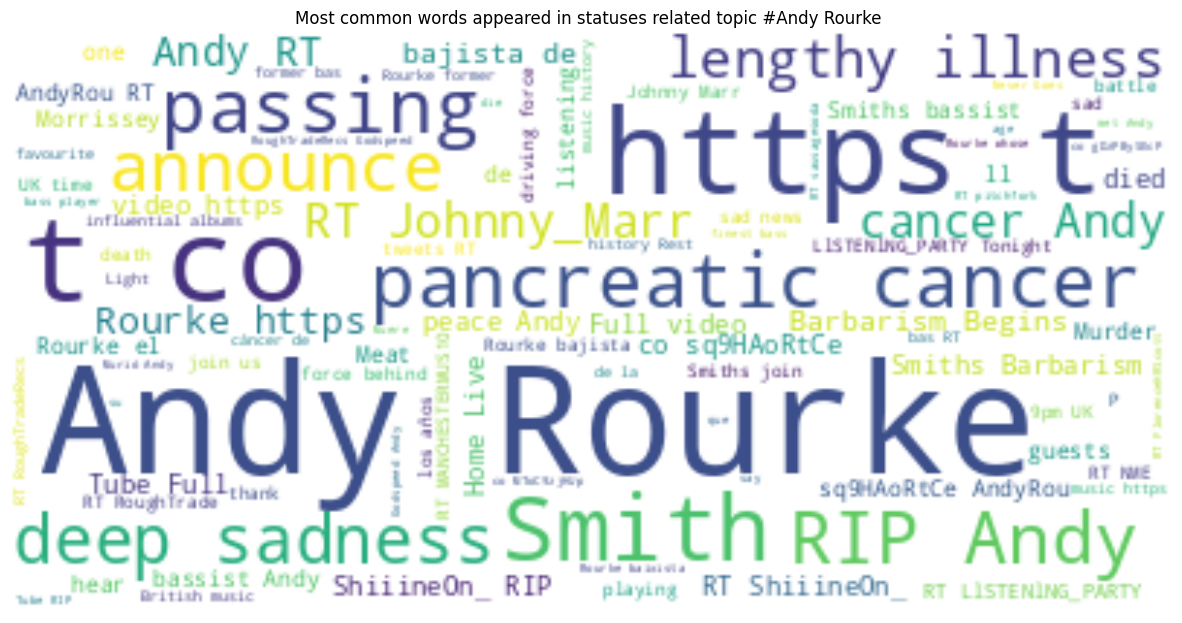

In [32]:
text1 = " ".join(i for i in df1['text'])
stopwords = set(STOPWORDS)
wordcloud = WordCloud(stopwords=stopwords, background_color="white").generate(text1)
plt.figure( figsize=(15,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.title('Most common words appeared in statuses related topic #%s ' %(q))
plt.axis("off")
plt.show()

In [ ]:
df1.to_csv('Sentiment.csv')